<a href="https://colab.research.google.com/github/pduyn308/ANN/blob/Vietnamese-Dishes-Recognition/Vietnamese_Dishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nguyentrongdai/vietnamese-foods-dataset")

print("Path to dataset files:", path)

100%|██████████| 935M/935M [00:12<00:00, 75.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nguyentrongdai/vietnamese-foods-dataset/versions/1


In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

vietnamesefood_classes = ['banh_bo', 'banh_bot_loc', 'banh_cong', 'banh_da_lon', 'banh_khot', 'banh_mi', 'banh_tai_heo', 'banh_tieu', 'banh_trung_thu', 'banh_xeo']
image_size = 64

data = []
labels = []

for i, vietnamesefood in enumerate(vietnamesefood_classes):
    folder = os.path.join(path, 'dataset', vietnamesefood)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img.flatten())
            labels.append(i)
        except:
            continue

data = np.array(data)
labels = to_categorical(labels, num_classes=len(vietnamesefood_classes))

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, activation='relu', input_shape=(image_size * image_size * 3,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(len(vietnamesefood_classes), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.1015 - loss: 2.2981 - val_accuracy: 0.0820 - val_loss: 2.3020
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - accuracy: 0.0899 - loss: 2.2997 - val_accuracy: 0.0820 - val_loss: 2.3024
Epoch 3/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - accuracy: 0.1081 - loss: 2.2964 - val_accuracy: 0.0820 - val_loss: 2.3024
Epoch 4/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.0979 - loss: 2.3020 - val_accuracy: 0.0820 - val_loss: 2.3024
Epoch 5/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - accuracy: 0.1092 - loss: 2.3018 - val_accuracy: 0.0820 - val_loss: 2.3027
Epoch 6/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 21s 107ms/step - accuracy: 0.1185 - loss: 2.2986 - val_accuracy: 0.0820 - val_loss: 2.3023
Epoch 7/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 21s 108ms/step - accuracy: 0.1117 - loss: 2.2991 - val_accuracy: 0.0820 - val_loss: 2.3025
Epoch 8/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.1099 - loss: 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


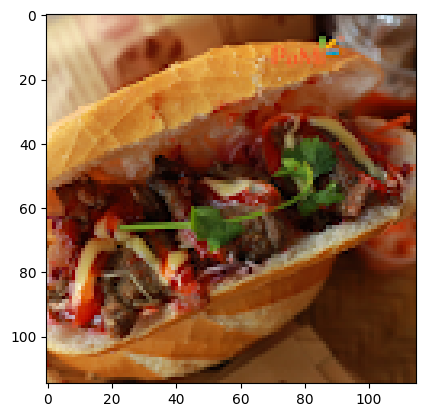

Predicted Vietnamese Dishes: banh_mi


In [17]:
import cv2

def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = img.flatten()
    return np.expand_dims(img, axis=0)

image_path = '/content/bánh mì.png'
processed_image = preprocess_image(image_path)
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)


img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
print(f"Predicted Vietnamese Dishes: {vietnamesefood_classes[predicted_class]}")